In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import sklearn.metrics as metrics
import seaborn as sns;
from kerastuner import HyperModel
from sklearn.model_selection import KFold
import tensorflow

In [2]:
directory='ck'
dir_list=os.listdir(directory)
images_data=[]
labels=[]
emotions=[]
emotions_count=[]
l=0
for data_dir in dir_list:
    data_list=os.listdir(directory+'/'+data_dir)
    emotions_count.append(len(data_list))
    for img in data_list:
        image = plt.imread(directory+'/'+data_dir+'/'+img)
        images_data.append(image.flatten())
        labels.append(l)
    emotions.append(data_dir)
    l=l+1
images_data = np.array(images_data)
emotions = np.array(emotions)
labels = np.array(labels)

In [3]:
directory = 'other'

images_other = []

dir_list=os.listdir(directory)
for img in dir_list:
    image = plt.imread(directory+'/'+img)
    images_other.append(image.flatten())
    
images_other = np.array(images_other)

images_other = images_other.reshape(images_other.shape[0], 48, 48, 1)

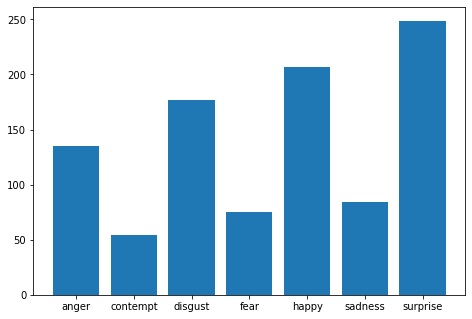

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(emotions,emotions_count)
plt.show()

id:  820
emotion:  surprise


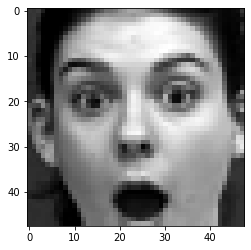

In [29]:
id = 820
print("id: ", id)
print("emotion: ",emotions[labels[id]])
plt.imshow(images_data[id].reshape(48,48), cmap=plt.get_cmap("gray"))

In [30]:
train_data, test_data, train_target, test_target=train_test_split(images_data, labels, test_size=0.1, random_state=101)

print("Before reshaping:\n")

print("train_data shape: ",train_data.shape)
print("test_data shape: ", test_data.shape)
print("train_target shape: ", train_target.shape)
print("test_target shape: ", test_target.shape)

train_data = train_data.reshape(train_data.shape[0], 48, 48, 1)
test_data = test_data.reshape(test_data.shape[0], 48, 48, 1)

print("\nAfter reshaping:\n")

print("train_data shape: ",train_data.shape)
print("test_data shape: ", test_data.shape)
print("train_target shape: ", train_target.shape)
print("test_target shape: ", test_target.shape)

Before reshaping:

train_data shape:  (882, 2304)
test_data shape:  (99, 2304)
train_target shape:  (882,)
test_target shape:  (99,)

After reshaping:

train_data shape:  (882, 48, 48, 1)
test_data shape:  (99, 48, 48, 1)
train_target shape:  (882,)
test_target shape:  (99,)


In [31]:
cnn = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(emotions), activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

run_hist = cnn.fit(train_data, train_target, epochs=30, validation_data=(test_data, test_target), shuffle=True, 
                          verbose=1)

Train on 882 samples, validate on 99 samples
Epoch 1/30
882/882 [==============================] - ETA: 24s - loss: 1.9356 - accuracy: 0.125 - ETA: 5s - loss: 1.8588 - accuracy: 0.195 - ETA: 3s - loss: 1.8202 - accuracy: 0.23 - ETA: 1s - loss: 1.8441 - accuracy: 0.24 - ETA: 1s - loss: 1.8306 - accuracy: 0.29 - ETA: 0s - loss: 1.8100 - accuracy: 0.32 - ETA: 0s - loss: 1.7929 - accuracy: 0.35 - ETA: 0s - loss: 1.7848 - accuracy: 0.35 - ETA: 0s - loss: 1.7807 - accuracy: 0.36 - 2s 2ms/sample - loss: 1.7757 - accuracy: 0.3810 - val_loss: 1.7183 - val_accuracy: 0.5455
Epoch 2/30
882/882 [==============================] - ETA: 0s - loss: 1.6401 - accuracy: 0.62 - ETA: 0s - loss: 1.5898 - accuracy: 0.57 - ETA: 0s - loss: 1.5649 - accuracy: 0.58 - ETA: 0s - loss: 1.5533 - accuracy: 0.57 - ETA: 0s - loss: 1.5250 - accuracy: 0.55 - ETA: 0s - loss: 1.5389 - accuracy: 0.53 - ETA: 0s - loss: 1.5180 - accuracy: 0.52 - ETA: 0s - loss: 1.5023 - accuracy: 0.54 - ETA: 0s - loss: 1.4898 - accuracy: 0.54 

882/882 [==============================] - ETA: 0s - loss: 0.0753 - accuracy: 0.96 - ETA: 0s - loss: 0.0383 - accuracy: 0.99 - ETA: 0s - loss: 0.0337 - accuracy: 0.99 - ETA: 0s - loss: 0.0589 - accuracy: 0.99 - ETA: 0s - loss: 0.0536 - accuracy: 0.99 - ETA: 0s - loss: 0.0542 - accuracy: 0.99 - ETA: 0s - loss: 0.0522 - accuracy: 0.99 - ETA: 0s - loss: 0.0484 - accuracy: 0.99 - ETA: 0s - loss: 0.0487 - accuracy: 0.99 - 1s 694us/sample - loss: 0.0460 - accuracy: 0.9943 - val_loss: 0.0592 - val_accuracy: 0.9798
Epoch 17/30
882/882 [==============================] - ETA: 0s - loss: 0.0241 - accuracy: 1.00 - ETA: 0s - loss: 0.0176 - accuracy: 1.00 - ETA: 0s - loss: 0.0171 - accuracy: 1.00 - ETA: 0s - loss: 0.0155 - accuracy: 1.00 - ETA: 0s - loss: 0.0148 - accuracy: 1.00 - ETA: 0s - loss: 0.0146 - accuracy: 1.00 - ETA: 0s - loss: 0.0137 - accuracy: 1.00 - ETA: 0s - loss: 0.0143 - accuracy: 1.00 - ETA: 0s - loss: 0.0151 - accuracy: 1.00 - ETA: 0s - loss: 0.0146 - accuracy: 1.00 - 1s 789us/sam

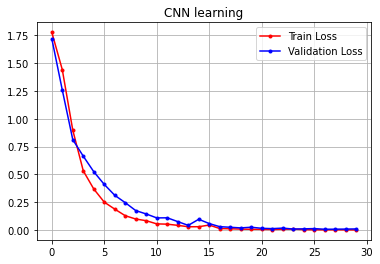

In [32]:
plt.plot(run_hist.history["loss"], 'r', marker='.', label="Train Loss")
plt.plot(run_hist.history["val_loss"], 'b', marker='.', label="Validation Loss")
plt.title("CNN learning")
plt.legend()
plt.grid()

<AxesSubplot:>

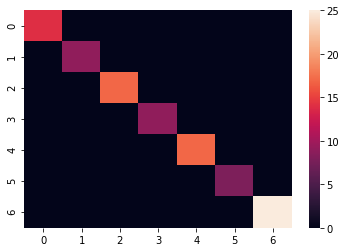

In [33]:
cnn_predictions = cnn.predict(test_data)
emotions_predictions = [np.argmax(prediction) for prediction in cnn_predictions]

confusion_matrix = metrics.confusion_matrix(y_true=test_target, y_pred=emotions_predictions)

sns.heatmap(confusion_matrix)

In [34]:
score = cnn.evaluate(test_data, test_target)

99/99 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 1.00 - 0s 312us/sample - loss: 0.0111 - accuracy: 1.0000


In [35]:
print('Model accuracy rate: ', score[1])
print('Model validation loss: ',score[0])

Model accuracy rate:  1.0
Model validation loss:  0.011068670888139743


In [36]:
kfold = KFold(n_splits=5, shuffle=True)

inputs = np.concatenate((train_data, test_data), axis=0)
targets = np.concatenate((train_target, test_target), axis=0)

accuracy = []
loss = []

for train, test in kfold.split(inputs, targets):
    cnn_f = models.Sequential([
        layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(filters=32, kernel_size=(3, 3), activation=relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(len(emotions), activation='softmax')
    ])
    cnn_f.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    cnn_f.fit(inputs[train], targets[train], epochs=30)
    
    scores = cnn_f.evaluate(inputs[test], targets[test])
    
    loss.append(scores[0])
    accuracy.append(scores[1])

Train on 784 samples
Epoch 1/30
784/784 [==============================] - ETA: 8s - loss: 1.9360 - accuracy: 0.09 - ETA: 3s - loss: 1.9341 - accuracy: 0.15 - ETA: 1s - loss: 1.8688 - accuracy: 0.20 - ETA: 0s - loss: 1.8196 - accuracy: 0.26 - ETA: 0s - loss: 1.8316 - accuracy: 0.25 - ETA: 0s - loss: 1.8158 - accuracy: 0.25 - ETA: 0s - loss: 1.8032 - accuracy: 0.27 - ETA: 0s - loss: 1.7911 - accuracy: 0.27 - ETA: 0s - loss: 1.7942 - accuracy: 0.28 - 1s 1ms/sample - loss: 1.7869 - accuracy: 0.2883
Epoch 2/30
784/784 [==============================] - ETA: 0s - loss: 1.6261 - accuracy: 0.34 - ETA: 0s - loss: 1.6266 - accuracy: 0.35 - ETA: 0s - loss: 1.6440 - accuracy: 0.39 - ETA: 0s - loss: 1.6045 - accuracy: 0.45 - ETA: 0s - loss: 1.5973 - accuracy: 0.44 - ETA: 0s - loss: 1.5768 - accuracy: 0.45 - ETA: 0s - loss: 1.5306 - accuracy: 0.47 - ETA: 0s - loss: 1.5248 - accuracy: 0.46 - 1s 699us/sample - loss: 1.5046 - accuracy: 0.4770
Epoch 3/30
784/784 [==============================] - ETA: 

784/784 [==============================] - ETA: 0s - loss: 0.0704 - accuracy: 0.96 - ETA: 0s - loss: 0.0618 - accuracy: 0.97 - ETA: 0s - loss: 0.0487 - accuracy: 0.98 - ETA: 0s - loss: 0.0515 - accuracy: 0.98 - ETA: 0s - loss: 0.0541 - accuracy: 0.98 - ETA: 0s - loss: 0.0497 - accuracy: 0.98 - ETA: 0s - loss: 0.0489 - accuracy: 0.98 - ETA: 0s - loss: 0.0466 - accuracy: 0.98 - 0s 602us/sample - loss: 0.0471 - accuracy: 0.9872
Epoch 20/30
784/784 [==============================] - ETA: 0s - loss: 0.0872 - accuracy: 1.00 - ETA: 0s - loss: 0.0474 - accuracy: 1.00 - ETA: 0s - loss: 0.0542 - accuracy: 0.98 - ETA: 0s - loss: 0.0474 - accuracy: 0.99 - ETA: 0s - loss: 0.0583 - accuracy: 0.98 - ETA: 0s - loss: 0.0520 - accuracy: 0.98 - ETA: 0s - loss: 0.0626 - accuracy: 0.98 - ETA: 0s - loss: 0.0595 - accuracy: 0.98 - 0s 615us/sample - loss: 0.0573 - accuracy: 0.9834
Epoch 21/30
784/784 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 1.00 - ETA: 0s - loss: 0.0221 - accuracy

785/785 [==============================] - ETA: 0s - loss: 0.7583 - accuracy: 0.75 - ETA: 0s - loss: 0.4617 - accuracy: 0.87 - ETA: 0s - loss: 0.3654 - accuracy: 0.90 - ETA: 0s - loss: 0.3548 - accuracy: 0.90 - ETA: 0s - loss: 0.3483 - accuracy: 0.89 - ETA: 0s - loss: 0.3534 - accuracy: 0.88 - ETA: 0s - loss: 0.3451 - accuracy: 0.89 - ETA: 0s - loss: 0.3394 - accuracy: 0.89 - ETA: 0s - loss: 0.3372 - accuracy: 0.89 - 1s 744us/sample - loss: 0.3359 - accuracy: 0.8994
Epoch 7/30
785/785 [==============================] - ETA: 0s - loss: 0.2207 - accuracy: 0.93 - ETA: 0s - loss: 0.2677 - accuracy: 0.89 - ETA: 0s - loss: 0.2798 - accuracy: 0.89 - ETA: 0s - loss: 0.2704 - accuracy: 0.90 - ETA: 0s - loss: 0.2631 - accuracy: 0.91 - ETA: 0s - loss: 0.2512 - accuracy: 0.92 - ETA: 0s - loss: 0.2538 - accuracy: 0.92 - ETA: 0s - loss: 0.2511 - accuracy: 0.92 - 0s 635us/sample - loss: 0.2419 - accuracy: 0.9274
Epoch 8/30
785/785 [==============================] - ETA: 0s - loss: 0.0770 - accuracy: 

785/785 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 1.00 - ETA: 0s - loss: 0.0056 - accuracy: 1.00 - ETA: 0s - loss: 0.0074 - accuracy: 1.00 - ETA: 0s - loss: 0.0095 - accuracy: 1.00 - ETA: 0s - loss: 0.0096 - accuracy: 1.00 - ETA: 0s - loss: 0.0088 - accuracy: 1.00 - ETA: 0s - loss: 0.0083 - accuracy: 1.00 - ETA: 0s - loss: 0.0093 - accuracy: 1.00 - 1s 638us/sample - loss: 0.0087 - accuracy: 1.0000
Epoch 25/30
785/785 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 1.00 - ETA: 0s - loss: 0.0093 - accuracy: 1.00 - ETA: 0s - loss: 0.0102 - accuracy: 1.00 - ETA: 0s - loss: 0.0121 - accuracy: 1.00 - ETA: 0s - loss: 0.0107 - accuracy: 1.00 - ETA: 0s - loss: 0.0094 - accuracy: 1.00 - ETA: 0s - loss: 0.0091 - accuracy: 1.00 - ETA: 0s - loss: 0.0093 - accuracy: 1.00 - 0s 625us/sample - loss: 0.0089 - accuracy: 1.0000
Epoch 26/30
785/785 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 1.00 - ETA: 0s - loss: 0.0055 - accuracy

785/785 [==============================] - ETA: 0s - loss: 0.0579 - accuracy: 1.00 - ETA: 0s - loss: 0.0883 - accuracy: 0.97 - ETA: 0s - loss: 0.0738 - accuracy: 0.98 - ETA: 0s - loss: 0.0874 - accuracy: 0.97 - ETA: 0s - loss: 0.0792 - accuracy: 0.98 - ETA: 0s - loss: 0.0940 - accuracy: 0.97 - ETA: 0s - loss: 0.0851 - accuracy: 0.98 - ETA: 0s - loss: 0.0851 - accuracy: 0.98 - 0s 626us/sample - loss: 0.0814 - accuracy: 0.9809
Epoch 13/30
785/785 [==============================] - ETA: 0s - loss: 0.0570 - accuracy: 0.96 - ETA: 0s - loss: 0.0553 - accuracy: 0.99 - ETA: 0s - loss: 0.0635 - accuracy: 0.99 - ETA: 0s - loss: 0.0632 - accuracy: 0.99 - ETA: 0s - loss: 0.0599 - accuracy: 0.99 - ETA: 0s - loss: 0.0600 - accuracy: 0.99 - ETA: 0s - loss: 0.0549 - accuracy: 0.99 - ETA: 0s - loss: 0.0566 - accuracy: 0.99 - 0s 623us/sample - loss: 0.0533 - accuracy: 0.9924
Epoch 14/30
785/785 [==============================] - ETA: 0s - loss: 0.0179 - accuracy: 1.00 - ETA: 0s - loss: 0.0313 - accuracy

196/196 [==============================] - ETA: 0s - loss: 0.0137 - accuracy: 1.00 - 0s 651us/sample - loss: 0.0230 - accuracy: 0.9898
Train on 785 samples
Epoch 1/30
785/785 [==============================] - ETA: 8s - loss: 1.9199 - accuracy: 0.21 - ETA: 2s - loss: 1.8599 - accuracy: 0.27 - ETA: 1s - loss: 1.8336 - accuracy: 0.27 - ETA: 0s - loss: 1.8509 - accuracy: 0.26 - ETA: 0s - loss: 1.8425 - accuracy: 0.29 - ETA: 0s - loss: 1.8243 - accuracy: 0.32 - ETA: 0s - loss: 1.8047 - accuracy: 0.35 - ETA: 0s - loss: 1.7890 - accuracy: 0.36 - 1s 1ms/sample - loss: 1.7749 - accuracy: 0.3694
Epoch 2/30
785/785 [==============================] - ETA: 0s - loss: 1.6061 - accuracy: 0.46 - ETA: 0s - loss: 1.5629 - accuracy: 0.52 - ETA: 0s - loss: 1.5739 - accuracy: 0.48 - ETA: 0s - loss: 1.5428 - accuracy: 0.48 - ETA: 0s - loss: 1.5361 - accuracy: 0.47 - ETA: 0s - loss: 1.5023 - accuracy: 0.50 - ETA: 0s - loss: 1.4804 - accuracy: 0.52 - ETA: 0s - loss: 1.4480 - accuracy: 0.52 - 0s 606us/sample 

785/785 [==============================] - ETA: 0s - loss: 0.0238 - accuracy: 1.00 - ETA: 0s - loss: 0.0155 - accuracy: 1.00 - ETA: 0s - loss: 0.0140 - accuracy: 1.00 - ETA: 0s - loss: 0.0178 - accuracy: 1.00 - ETA: 0s - loss: 0.0171 - accuracy: 1.00 - ETA: 0s - loss: 0.0193 - accuracy: 1.00 - ETA: 0s - loss: 0.0192 - accuracy: 1.00 - ETA: 0s - loss: 0.0190 - accuracy: 1.00 - 0s 613us/sample - loss: 0.0181 - accuracy: 1.0000
Epoch 19/30
785/785 [==============================] - ETA: 0s - loss: 0.0353 - accuracy: 1.00 - ETA: 0s - loss: 0.0175 - accuracy: 1.00 - ETA: 0s - loss: 0.0163 - accuracy: 1.00 - ETA: 0s - loss: 0.0164 - accuracy: 1.00 - ETA: 0s - loss: 0.0154 - accuracy: 1.00 - ETA: 0s - loss: 0.0139 - accuracy: 1.00 - ETA: 0s - loss: 0.0143 - accuracy: 1.00 - ETA: 0s - loss: 0.0134 - accuracy: 1.00 - 0s 611us/sample - loss: 0.0136 - accuracy: 1.0000
Epoch 20/30
785/785 [==============================] - ETA: 0s - loss: 0.0099 - accuracy: 1.00 - ETA: 0s - loss: 0.0094 - accuracy

785/785 [==============================] - ETA: 0s - loss: 0.5220 - accuracy: 0.81 - ETA: 0s - loss: 0.5208 - accuracy: 0.79 - ETA: 0s - loss: 0.4923 - accuracy: 0.81 - ETA: 0s - loss: 0.4930 - accuracy: 0.81 - ETA: 0s - loss: 0.4869 - accuracy: 0.82 - ETA: 0s - loss: 0.4803 - accuracy: 0.83 - ETA: 0s - loss: 0.4833 - accuracy: 0.83 - ETA: 0s - loss: 0.4675 - accuracy: 0.84 - 0s 631us/sample - loss: 0.4588 - accuracy: 0.8459
Epoch 7/30
785/785 [==============================] - ETA: 0s - loss: 0.4303 - accuracy: 0.81 - ETA: 0s - loss: 0.3568 - accuracy: 0.85 - ETA: 0s - loss: 0.3550 - accuracy: 0.87 - ETA: 0s - loss: 0.3414 - accuracy: 0.89 - ETA: 0s - loss: 0.3176 - accuracy: 0.90 - ETA: 0s - loss: 0.3086 - accuracy: 0.90 - ETA: 0s - loss: 0.3050 - accuracy: 0.90 - ETA: 0s - loss: 0.2978 - accuracy: 0.91 - 0s 616us/sample - loss: 0.2914 - accuracy: 0.9159
Epoch 8/30
785/785 [==============================] - ETA: 0s - loss: 0.1238 - accuracy: 1.00 - ETA: 0s - loss: 0.1600 - accuracy: 

785/785 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 1.00 - ETA: 0s - loss: 0.0135 - accuracy: 1.00 - ETA: 0s - loss: 0.0160 - accuracy: 0.99 - ETA: 0s - loss: 0.0144 - accuracy: 0.99 - ETA: 0s - loss: 0.0134 - accuracy: 0.99 - ETA: 0s - loss: 0.0141 - accuracy: 0.99 - ETA: 0s - loss: 0.0128 - accuracy: 0.99 - ETA: 0s - loss: 0.0116 - accuracy: 0.99 - ETA: 0s - loss: 0.0118 - accuracy: 0.99 - 1s 720us/sample - loss: 0.0118 - accuracy: 0.9987
Epoch 25/30
785/785 [==============================] - ETA: 0s - loss: 0.0392 - accuracy: 1.00 - ETA: 0s - loss: 0.0163 - accuracy: 1.00 - ETA: 0s - loss: 0.0107 - accuracy: 1.00 - ETA: 0s - loss: 0.0107 - accuracy: 1.00 - ETA: 0s - loss: 0.0094 - accuracy: 1.00 - ETA: 0s - loss: 0.0084 - accuracy: 1.00 - ETA: 0s - loss: 0.0089 - accuracy: 1.00 - ETA: 0s - loss: 0.0090 - accuracy: 1.00 - ETA: 0s - loss: 0.0086 - accuracy: 1.00 - 1s 712us/sample - loss: 0.0085 - accuracy: 1.0000
Epoch 26/30
785/785 [=========================

In [58]:
print('Model average accuracy: ', sum(accuracy)/len(accuracy))
print('Model average validation loss: ', sum(loss)/len(loss))

Model average accuracy:  0.9898114562034607
Model average validation loss:  0.02724104280314482


In [47]:
cnn_d = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.15),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(len(emotions), activation='softmax')
])

cnn_d.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

run_hist_d = cnn_d.fit(train_data, train_target, epochs=30, validation_data=(test_data, test_target), shuffle=True, 
                          verbose=1)

Train on 882 samples, validate on 99 samples
Epoch 1/30
882/882 [==============================] - ETA: 10s - loss: 1.9638 - accuracy: 0.250 - ETA: 2s - loss: 1.8952 - accuracy: 0.250 - ETA: 1s - loss: 1.8846 - accuracy: 0.25 - ETA: 1s - loss: 1.8924 - accuracy: 0.24 - ETA: 0s - loss: 1.8855 - accuracy: 0.26 - ETA: 0s - loss: 1.8747 - accuracy: 0.25 - ETA: 0s - loss: 1.8654 - accuracy: 0.27 - ETA: 0s - loss: 1.8485 - accuracy: 0.28 - ETA: 0s - loss: 1.8508 - accuracy: 0.28 - 1s 1ms/sample - loss: 1.8442 - accuracy: 0.2857 - val_loss: 1.8220 - val_accuracy: 0.4040
Epoch 2/30
882/882 [==============================] - ETA: 0s - loss: 1.8617 - accuracy: 0.34 - ETA: 0s - loss: 1.7474 - accuracy: 0.37 - ETA: 0s - loss: 1.7798 - accuracy: 0.35 - ETA: 0s - loss: 1.7619 - accuracy: 0.35 - ETA: 0s - loss: 1.7406 - accuracy: 0.34 - ETA: 0s - loss: 1.7429 - accuracy: 0.34 - ETA: 0s - loss: 1.7242 - accuracy: 0.37 - ETA: 0s - loss: 1.7056 - accuracy: 0.39 - ETA: 0s - loss: 1.6864 - accuracy: 0.39 

882/882 [==============================] - ETA: 0s - loss: 0.0865 - accuracy: 1.00 - ETA: 0s - loss: 0.1813 - accuracy: 0.93 - ETA: 0s - loss: 0.2162 - accuracy: 0.92 - ETA: 0s - loss: 0.2238 - accuracy: 0.92 - ETA: 0s - loss: 0.2187 - accuracy: 0.92 - ETA: 0s - loss: 0.2488 - accuracy: 0.91 - ETA: 0s - loss: 0.2619 - accuracy: 0.91 - ETA: 0s - loss: 0.2538 - accuracy: 0.91 - ETA: 0s - loss: 0.2553 - accuracy: 0.91 - ETA: 0s - loss: 0.2554 - accuracy: 0.91 - ETA: 0s - loss: 0.2475 - accuracy: 0.91 - ETA: 0s - loss: 0.2513 - accuracy: 0.91 - 1s 853us/sample - loss: 0.2486 - accuracy: 0.9218 - val_loss: 0.2483 - val_accuracy: 0.9495
Epoch 15/30
882/882 [==============================] - ETA: 0s - loss: 0.2514 - accuracy: 0.96 - ETA: 0s - loss: 0.2138 - accuracy: 0.94 - ETA: 0s - loss: 0.2346 - accuracy: 0.92 - ETA: 0s - loss: 0.2193 - accuracy: 0.93 - ETA: 0s - loss: 0.2065 - accuracy: 0.93 - ETA: 0s - loss: 0.2188 - accuracy: 0.92 - ETA: 0s - loss: 0.2373 - accuracy: 0.91 - ETA: 0s - lo

882/882 [==============================] - ETA: 0s - loss: 0.1456 - accuracy: 0.93 - ETA: 0s - loss: 0.1087 - accuracy: 0.96 - ETA: 0s - loss: 0.1139 - accuracy: 0.96 - ETA: 0s - loss: 0.1132 - accuracy: 0.96 - ETA: 0s - loss: 0.1089 - accuracy: 0.96 - ETA: 0s - loss: 0.1150 - accuracy: 0.96 - ETA: 0s - loss: 0.1136 - accuracy: 0.96 - ETA: 0s - loss: 0.1110 - accuracy: 0.96 - ETA: 0s - loss: 0.1061 - accuracy: 0.96 - ETA: 0s - loss: 0.1006 - accuracy: 0.96 - 1s 780us/sample - loss: 0.0981 - accuracy: 0.9671 - val_loss: 0.0615 - val_accuracy: 0.9899
Epoch 29/30
882/882 [==============================] - ETA: 0s - loss: 0.1593 - accuracy: 0.93 - ETA: 0s - loss: 0.1203 - accuracy: 0.94 - ETA: 0s - loss: 0.1185 - accuracy: 0.95 - ETA: 0s - loss: 0.1005 - accuracy: 0.96 - ETA: 0s - loss: 0.1000 - accuracy: 0.96 - ETA: 0s - loss: 0.0953 - accuracy: 0.96 - ETA: 0s - loss: 0.0972 - accuracy: 0.96 - ETA: 0s - loss: 0.0918 - accuracy: 0.96 - ETA: 0s - loss: 0.0924 - accuracy: 0.96 - ETA: 0s - lo

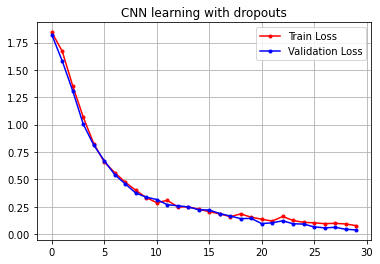

In [50]:
plt.plot(run_hist_d.history["loss"], 'r', marker='.', label="Train Loss")
plt.plot(run_hist_d.history["val_loss"], 'b', marker='.', label="Validation Loss")
plt.title("CNN learning with dropouts")
plt.legend()
plt.grid()

<AxesSubplot:>

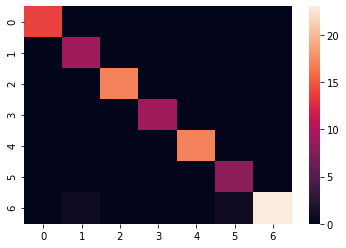

In [40]:
cnn_d_predictions = cnn_d.predict(test_data)
emotions_predictions_d = [np.argmax(prediction) for prediction in cnn_d_predictions]

confusion_matrix_d = metrics.confusion_matrix(y_true=test_target, y_pred=emotions_predictions_d)

sns.heatmap(confusion_matrix_d)

In [48]:
score_d = cnn_d.evaluate(test_data, test_target)

99/99 [==============================] - ETA: 0s - loss: 0.0298 - accuracy: 1.00 - 0s 261us/sample - loss: 0.0377 - accuracy: 1.0000


In [49]:
print('Model accuracy rate: ', score_d[1])
print('Model validation loss: ',score_d[0])

Model accuracy rate:  1.0
Model validation loss:  0.03770411116155711


In [61]:
kfold = KFold(n_splits=5, shuffle=True)

inputs = np.concatenate((train_data, test_data), axis=0)
targets = np.concatenate((train_target, test_target), axis=0)

accuracy_d = []
loss_d = []

for train, test in kfold.split(inputs, targets):
    cnn_d_f = models.Sequential([
        layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.15),

        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.25),
        layers.Dense(len(emotions), activation='softmax')
    ])
    cnn_d_f.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    cnn_d_f.fit(inputs[train], targets[train], epochs=30)
    
    scores_d = cnn_d_f.evaluate(inputs[test], targets[test])
    
    loss_d.append(scores[0])
    accuracy_d.append(scores[1])

ERROR! Session/line number was not unique in database. History logging moved to new session 199
Train on 784 samples
Epoch 1/30
784/784 [==============================] - ETA: 13s - loss: 1.9004 - accuracy: 0.281 - ETA: 3s - loss: 1.9404 - accuracy: 0.296 - ETA: 2s - loss: 1.9501 - accuracy: 0.25 - ETA: 1s - loss: 1.9290 - accuracy: 0.23 - ETA: 0s - loss: 1.9048 - accuracy: 0.23 - ETA: 0s - loss: 1.8890 - accuracy: 0.24 - ETA: 0s - loss: 1.8881 - accuracy: 0.26 - ETA: 0s - loss: 1.8830 - accuracy: 0.26 - ETA: 0s - loss: 1.8828 - accuracy: 0.26 - 1s 1ms/sample - loss: 1.8819 - accuracy: 0.2615
Epoch 2/30
784/784 [==============================] - ETA: 0s - loss: 1.8094 - accuracy: 0.18 - ETA: 0s - loss: 1.8033 - accuracy: 0.28 - ETA: 0s - loss: 1.7795 - accuracy: 0.29 - ETA: 0s - loss: 1.7738 - accuracy: 0.27 - ETA: 0s - loss: 1.8015 - accuracy: 0.27 - ETA: 0s - loss: 1.7977 - accuracy: 0.29 - ETA: 0s - loss: 1.7857 - accuracy: 0.30 - ETA: 0s - loss: 1.7765 - accuracy: 0.31 - ETA: 0s - 

784/784 [==============================] - ETA: 0s - loss: 0.1956 - accuracy: 0.90 - ETA: 0s - loss: 0.3010 - accuracy: 0.89 - ETA: 0s - loss: 0.2710 - accuracy: 0.90 - ETA: 0s - loss: 0.2536 - accuracy: 0.91 - ETA: 0s - loss: 0.2425 - accuracy: 0.91 - ETA: 0s - loss: 0.2602 - accuracy: 0.90 - ETA: 0s - loss: 0.2680 - accuracy: 0.90 - ETA: 0s - loss: 0.2525 - accuracy: 0.91 - ETA: 0s - loss: 0.2491 - accuracy: 0.91 - 1s 765us/sample - loss: 0.2486 - accuracy: 0.9133
Epoch 18/30
784/784 [==============================] - ETA: 0s - loss: 0.1471 - accuracy: 0.90 - ETA: 0s - loss: 0.2584 - accuracy: 0.87 - ETA: 0s - loss: 0.2119 - accuracy: 0.90 - ETA: 0s - loss: 0.2021 - accuracy: 0.91 - ETA: 0s - loss: 0.2129 - accuracy: 0.91 - ETA: 0s - loss: 0.2039 - accuracy: 0.92 - ETA: 0s - loss: 0.2059 - accuracy: 0.92 - ETA: 0s - loss: 0.1974 - accuracy: 0.93 - ETA: 0s - loss: 0.2119 - accuracy: 0.92 - ETA: 0s - loss: 0.2164 - accuracy: 0.92 - 1s 777us/sample - loss: 0.2141 - accuracy: 0.9247
Epoc

785/785 [==============================] - ETA: 10s - loss: 1.9368 - accuracy: 0.125 - ETA: 3s - loss: 1.9776 - accuracy: 0.125 - ETA: 2s - loss: 1.9317 - accuracy: 0.15 - ETA: 1s - loss: 1.9241 - accuracy: 0.15 - ETA: 0s - loss: 1.9134 - accuracy: 0.17 - ETA: 0s - loss: 1.8956 - accuracy: 0.19 - ETA: 0s - loss: 1.8860 - accuracy: 0.19 - ETA: 0s - loss: 1.8699 - accuracy: 0.21 - ETA: 0s - loss: 1.8582 - accuracy: 0.23 - ETA: 0s - loss: 1.8618 - accuracy: 0.22 - 1s 1ms/sample - loss: 1.8656 - accuracy: 0.2255
Epoch 2/30
785/785 [==============================] - ETA: 0s - loss: 1.6009 - accuracy: 0.40 - ETA: 0s - loss: 1.8059 - accuracy: 0.32 - ETA: 0s - loss: 1.8052 - accuracy: 0.31 - ETA: 0s - loss: 1.7988 - accuracy: 0.27 - ETA: 0s - loss: 1.7999 - accuracy: 0.26 - ETA: 0s - loss: 1.7992 - accuracy: 0.26 - ETA: 0s - loss: 1.7932 - accuracy: 0.27 - ETA: 0s - loss: 1.7889 - accuracy: 0.28 - ETA: 0s - loss: 1.7952 - accuracy: 0.27 - ETA: 0s - loss: 1.7919 - accuracy: 0.27 - ETA: 0s - lo

785/785 [==============================] - ETA: 0s - loss: 0.2111 - accuracy: 0.93 - ETA: 0s - loss: 0.2751 - accuracy: 0.91 - ETA: 0s - loss: 0.3032 - accuracy: 0.89 - ETA: 0s - loss: 0.2913 - accuracy: 0.89 - ETA: 0s - loss: 0.3098 - accuracy: 0.88 - ETA: 0s - loss: 0.2957 - accuracy: 0.88 - ETA: 0s - loss: 0.2967 - accuracy: 0.89 - ETA: 0s - loss: 0.2988 - accuracy: 0.89 - ETA: 0s - loss: 0.3041 - accuracy: 0.89 - ETA: 0s - loss: 0.3038 - accuracy: 0.89 - 1s 783us/sample - loss: 0.3042 - accuracy: 0.8879
Epoch 17/30
785/785 [==============================] - ETA: 0s - loss: 0.2596 - accuracy: 0.87 - ETA: 0s - loss: 0.2226 - accuracy: 0.89 - ETA: 0s - loss: 0.2054 - accuracy: 0.91 - ETA: 0s - loss: 0.2393 - accuracy: 0.89 - ETA: 0s - loss: 0.2445 - accuracy: 0.89 - ETA: 0s - loss: 0.2525 - accuracy: 0.90 - ETA: 0s - loss: 0.2528 - accuracy: 0.90 - ETA: 0s - loss: 0.2562 - accuracy: 0.90 - ETA: 0s - loss: 0.2595 - accuracy: 0.90 - ETA: 0s - loss: 0.2503 - accuracy: 0.90 - ETA: 0s - lo

785/785 [==============================] - ETA: 10s - loss: 1.9246 - accuracy: 0.156 - ETA: 3s - loss: 1.8702 - accuracy: 0.156 - ETA: 2s - loss: 1.8361 - accuracy: 0.16 - ETA: 1s - loss: 1.8728 - accuracy: 0.19 - ETA: 0s - loss: 1.8542 - accuracy: 0.20 - ETA: 0s - loss: 1.8505 - accuracy: 0.21 - ETA: 0s - loss: 1.8349 - accuracy: 0.23 - ETA: 0s - loss: 1.8289 - accuracy: 0.23 - ETA: 0s - loss: 1.8090 - accuracy: 0.25 - ETA: 0s - loss: 1.8088 - accuracy: 0.25 - 1s 1ms/sample - loss: 1.8029 - accuracy: 0.2637
Epoch 2/30
785/785 [==============================] - ETA: 0s - loss: 1.7643 - accuracy: 0.34 - ETA: 0s - loss: 1.7272 - accuracy: 0.32 - ETA: 0s - loss: 1.7548 - accuracy: 0.28 - ETA: 0s - loss: 1.7163 - accuracy: 0.30 - ETA: 0s - loss: 1.6993 - accuracy: 0.33 - ETA: 0s - loss: 1.7121 - accuracy: 0.35 - ETA: 0s - loss: 1.7135 - accuracy: 0.36 - ETA: 0s - loss: 1.7053 - accuracy: 0.35 - ETA: 0s - loss: 1.6920 - accuracy: 0.35 - ETA: 0s - loss: 1.6880 - accuracy: 0.36 - 1s 775us/sam

785/785 [==============================] - ETA: 0s - loss: 0.2179 - accuracy: 0.90 - ETA: 0s - loss: 0.1957 - accuracy: 0.92 - ETA: 0s - loss: 0.2138 - accuracy: 0.91 - ETA: 0s - loss: 0.2161 - accuracy: 0.91 - ETA: 0s - loss: 0.2200 - accuracy: 0.91 - ETA: 0s - loss: 0.2317 - accuracy: 0.91 - ETA: 0s - loss: 0.2370 - accuracy: 0.91 - ETA: 0s - loss: 0.2297 - accuracy: 0.91 - ETA: 0s - loss: 0.2281 - accuracy: 0.91 - ETA: 0s - loss: 0.2278 - accuracy: 0.92 - 1s 771us/sample - loss: 0.2359 - accuracy: 0.9159
Epoch 17/30
785/785 [==============================] - ETA: 0s - loss: 0.1520 - accuracy: 0.96 - ETA: 0s - loss: 0.1622 - accuracy: 0.98 - ETA: 0s - loss: 0.1745 - accuracy: 0.95 - ETA: 0s - loss: 0.2082 - accuracy: 0.93 - ETA: 0s - loss: 0.2243 - accuracy: 0.92 - ETA: 0s - loss: 0.2333 - accuracy: 0.92 - ETA: 0s - loss: 0.2206 - accuracy: 0.93 - ETA: 0s - loss: 0.2158 - accuracy: 0.93 - ETA: 0s - loss: 0.2085 - accuracy: 0.93 - 1s 760us/sample - loss: 0.2164 - accuracy: 0.9312
Epoc

785/785 [==============================] - ETA: 10s - loss: 1.9718 - accuracy: 0.031 - ETA: 3s - loss: 1.8924 - accuracy: 0.177 - ETA: 2s - loss: 1.9319 - accuracy: 0.16 - ETA: 1s - loss: 1.9172 - accuracy: 0.18 - ETA: 1s - loss: 1.8948 - accuracy: 0.20 - ETA: 0s - loss: 1.8768 - accuracy: 0.20 - ETA: 0s - loss: 1.8658 - accuracy: 0.21 - ETA: 0s - loss: 1.8593 - accuracy: 0.21 - ETA: 0s - loss: 1.8618 - accuracy: 0.21 - ETA: 0s - loss: 1.8421 - accuracy: 0.24 - 1s 1ms/sample - loss: 1.8399 - accuracy: 0.2561
Epoch 2/30
785/785 [==============================] - ETA: 0s - loss: 1.9582 - accuracy: 0.15 - ETA: 0s - loss: 1.8288 - accuracy: 0.25 - ETA: 0s - loss: 1.8093 - accuracy: 0.28 - ETA: 0s - loss: 1.8037 - accuracy: 0.29 - ETA: 0s - loss: 1.7744 - accuracy: 0.31 - ETA: 0s - loss: 1.7607 - accuracy: 0.30 - ETA: 0s - loss: 1.7556 - accuracy: 0.31 - ETA: 0s - loss: 1.7352 - accuracy: 0.34 - ETA: 0s - loss: 1.7269 - accuracy: 0.35 - ETA: 0s - loss: 1.7353 - accuracy: 0.35 - ETA: 0s - lo

785/785 [==============================] - ETA: 0s - loss: 0.2307 - accuracy: 0.90 - ETA: 0s - loss: 0.2970 - accuracy: 0.88 - ETA: 0s - loss: 0.3470 - accuracy: 0.87 - ETA: 0s - loss: 0.3550 - accuracy: 0.87 - ETA: 0s - loss: 0.3642 - accuracy: 0.86 - ETA: 0s - loss: 0.3493 - accuracy: 0.87 - ETA: 0s - loss: 0.3517 - accuracy: 0.87 - ETA: 0s - loss: 0.3512 - accuracy: 0.87 - ETA: 0s - loss: 0.3365 - accuracy: 0.88 - ETA: 0s - loss: 0.3347 - accuracy: 0.88 - ETA: 0s - loss: 0.3380 - accuracy: 0.88 - ETA: 0s - loss: 0.3230 - accuracy: 0.88 - 1s 815us/sample - loss: 0.3363 - accuracy: 0.8815
Epoch 16/30
785/785 [==============================] - ETA: 0s - loss: 0.2833 - accuracy: 0.90 - ETA: 0s - loss: 0.3237 - accuracy: 0.87 - ETA: 0s - loss: 0.3225 - accuracy: 0.88 - ETA: 0s - loss: 0.2983 - accuracy: 0.89 - ETA: 0s - loss: 0.2932 - accuracy: 0.90 - ETA: 0s - loss: 0.2979 - accuracy: 0.89 - ETA: 0s - loss: 0.2921 - accuracy: 0.89 - ETA: 0s - loss: 0.2881 - accuracy: 0.90 - ETA: 0s - lo

Epoch 30/30
196/196 [==============================] - ETA: 0s - loss: 0.0591 - accuracy: 0.96 - 0s 698us/sample - loss: 0.0855 - accuracy: 0.9643
Train on 785 samples
Epoch 1/30
785/785 [==============================] - ETA: 10s - loss: 1.9740 - accuracy: 0.062 - ETA: 3s - loss: 1.9508 - accuracy: 0.104 - ETA: 2s - loss: 1.9346 - accuracy: 0.14 - ETA: 1s - loss: 1.9060 - accuracy: 0.17 - ETA: 0s - loss: 1.8834 - accuracy: 0.20 - ETA: 0s - loss: 1.8822 - accuracy: 0.21 - ETA: 0s - loss: 1.8721 - accuracy: 0.22 - ETA: 0s - loss: 1.8409 - accuracy: 0.24 - ETA: 0s - loss: 1.8470 - accuracy: 0.24 - ETA: 0s - loss: 1.8400 - accuracy: 0.24 - ETA: 0s - loss: 1.8351 - accuracy: 0.26 - 1s 1ms/sample - loss: 1.8346 - accuracy: 0.2611
Epoch 2/30
785/785 [==============================] - ETA: 0s - loss: 1.7367 - accuracy: 0.21 - ETA: 0s - loss: 1.7931 - accuracy: 0.25 - ETA: 0s - loss: 1.7757 - accuracy: 0.30 - ETA: 0s - loss: 1.7633 - accuracy: 0.34 - ETA: 0s - loss: 1.7461 - accuracy: 0.37 - E

785/785 [==============================] - ETA: 0s - loss: 0.2062 - accuracy: 0.96 - ETA: 0s - loss: 0.2072 - accuracy: 0.94 - ETA: 0s - loss: 0.1910 - accuracy: 0.94 - ETA: 0s - loss: 0.1672 - accuracy: 0.95 - ETA: 0s - loss: 0.1738 - accuracy: 0.94 - ETA: 0s - loss: 0.1776 - accuracy: 0.94 - ETA: 0s - loss: 0.1801 - accuracy: 0.94 - ETA: 0s - loss: 0.1726 - accuracy: 0.94 - ETA: 0s - loss: 0.1728 - accuracy: 0.94 - ETA: 0s - loss: 0.1752 - accuracy: 0.94 - 1s 769us/sample - loss: 0.1745 - accuracy: 0.9427
Epoch 16/30
785/785 [==============================] - ETA: 0s - loss: 0.0921 - accuracy: 1.00 - ETA: 0s - loss: 0.1367 - accuracy: 0.96 - ETA: 0s - loss: 0.1453 - accuracy: 0.95 - ETA: 0s - loss: 0.1418 - accuracy: 0.95 - ETA: 0s - loss: 0.1535 - accuracy: 0.95 - ETA: 0s - loss: 0.1648 - accuracy: 0.94 - ETA: 0s - loss: 0.1553 - accuracy: 0.95 - ETA: 0s - loss: 0.1593 - accuracy: 0.94 - 1s 739us/sample - loss: 0.1510 - accuracy: 0.9529
Epoch 17/30
785/785 [=========================

196/196 [==============================] - ETA: 0s - loss: 0.0141 - accuracy: 1.00 - 0s 647us/sample - loss: 0.0725 - accuracy: 0.9796


In [62]:
print('Model average accuracy: ', sum(accuracy_d)/len(accuracy_d))
print('Model average validation loss: ', sum(loss_d)/len(loss_d))

Model average accuracy:  1.0
Model average validation loss:  0.010062492585236714


0
id:  55
correct emotion:  anger
predicted emotion - model without dropouts:  anger
predicted emotion - model with dropouts:  anger


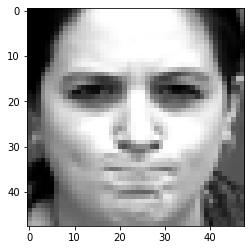

In [69]:
id = 55

prediction_data = images_data[id].reshape(1,48,48,1)

prediction_target=cnn.predict(prediction_data)
prediction_target_d=cnn_d.predict(prediction_data)


print(np.argmax(prediction_target))

print("id: ", id)
print("correct emotion: ",emotions[labels[id]])
print("predicted emotion - model without dropouts: ",emotions[np.argmax(prediction_target)])
print("predicted emotion - model with dropouts: ",emotions[np.argmax(prediction_target_d)])

plt.imshow(images_data[id].reshape(48,48), cmap=plt.get_cmap("gray"))

0
id:  4
predicted emotion - model without dropouts:  anger
predicted emotion - model with dropouts:  anger


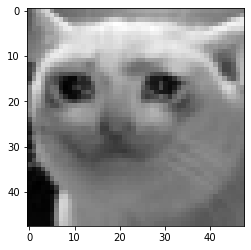

In [73]:
id = 4

prediction_data = images_other[id].reshape(1,48,48,1)

prediction_target=cnn.predict(prediction_data)
prediction_target_d=cnn_d.predict(prediction_data)


print(np.argmax(prediction_target))

print("id: ", id)
print("predicted emotion - model without dropouts: ",emotions[np.argmax(prediction_target)])
print("predicted emotion - model with dropouts: ",emotions[np.argmax(prediction_target_d)])

plt.imshow(images_other[id].reshape(48,48), cmap=plt.get_cmap("gray"))